In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from transform_factory import resize_322, center_crop_224
from captum.attr import visualization as viz
import torch

In [2]:
seed = 0
expl_method = "GradCAM"
data_num = 0
dataset = "center_crop_224"
orig_input_method = "center_crop_224"

In [3]:
with open(f"./val_{dataset}_seed_{seed}.npy", "rb") as f:
    filepath_list = np.load(f)

for filepath in filepath_list[data_num:data_num+1]:
    print(filepath)
    img_name = os.path.basename(filepath)
    print(img_name)

    results_path = f"results/val_seed_{seed}_dataset_{dataset}_orig_input_method_{orig_input_method}_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_results.pkl"

    with open(results_path, "rb") as f:
        results = np.load(f, allow_pickle=True)

/home/juhyeon/Imagenet/val/n04127249/ILSVRC2012_val_00024718.JPEG
ILSVRC2012_val_00024718.JPEG


In [4]:
orig_expl = results[0]['orig_expl']

print(orig_expl.min(), orig_expl.max())

tensor(-0.0474) tensor(1.2092)


tensor(0.9501)


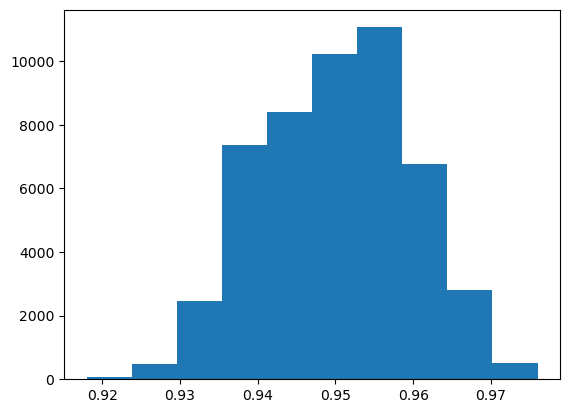

In [5]:
plt.hist(results[0]['coverage_prob'].flatten())
# plt.xlim(0, 1, 0.05)

print(results[0]['coverage_prob'].flatten().mean())

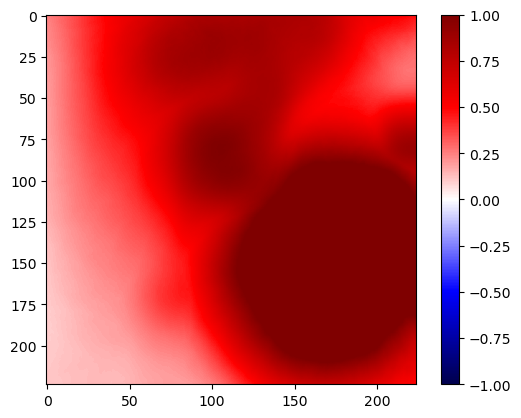

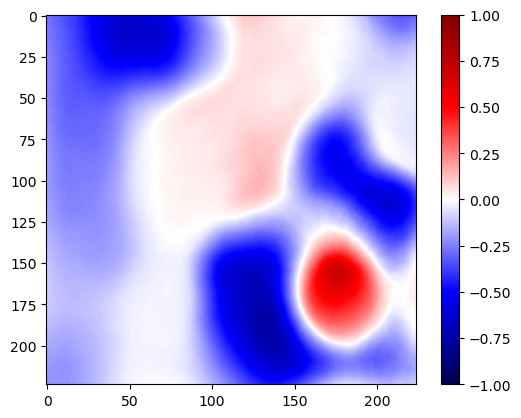

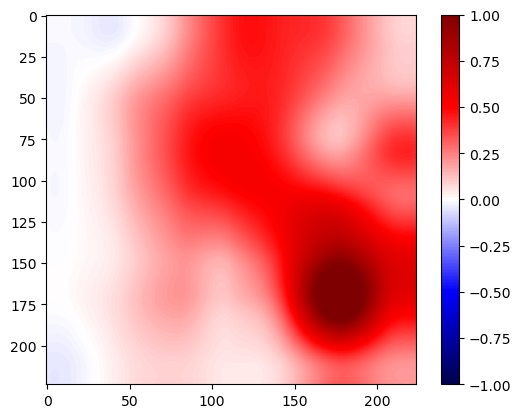

In [6]:
plt.imshow(results[0]['conf_high'].squeeze(), cmap="seismic")
plt.clim(-1, 1)
plt.colorbar()
plt.show()

plt.imshow(results[0]['conf_low'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()

plt.imshow(results[0]['orig_expl'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()


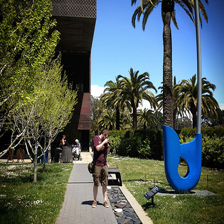

In [7]:
center_crop_224(resize_322(Image.open(filepath_list[data_num])))


In [198]:
conf_high = results[0]['conf_high'].squeeze()
conf_low = results[0]['conf_low'].squeeze()
orig_expl = results[0]['orig_expl']

print(224 * 224)
print(torch.where(torch.logical_and(orig_expl < 0, conf_high > 0))[0].shape)
print(torch.where(torch.logical_and(orig_expl < 0, conf_high < 0))[0].shape)

print(torch.where(torch.logical_and(orig_expl > 0, conf_low > 0))[0].shape)
print(torch.where(torch.logical_and(orig_expl > 0, conf_low < 0))[0].shape)



np_idx = torch.where(torch.logical_and(orig_expl < 0, conf_high > 0))



50176
torch.Size([3782])
torch.Size([0])
torch.Size([21559])
torch.Size([24835])
tensor(-0.0328) tensor(2.2729)


In [196]:
print(np_idx)

for r, c in zip(np_idx[0], np_idx[1]):
    print(orig_expl[r, c], conf_high[r, c])

(tensor([  0,   0,   0,  ..., 223, 223, 223]), tensor([92, 93, 94,  ..., 60, 61, 62]))
tensor(-0.0002) tensor(0.5310)
tensor(-0.0009) tensor(0.5408)
tensor(-0.0015) tensor(0.5541)
tensor(-0.0020) tensor(0.5658)
tensor(-0.0023) tensor(0.5731)
tensor(-0.0024) tensor(0.5828)
tensor(-0.0023) tensor(0.5913)
tensor(-0.0021) tensor(0.6036)
tensor(-0.0016) tensor(0.6117)
tensor(-0.0009) tensor(0.6205)
tensor(-3.8449e-05) tensor(0.6285)
tensor(-0.0035) tensor(0.1762)
tensor(-0.0068) tensor(0.1679)
tensor(-0.0097) tensor(0.1599)
tensor(-0.0123) tensor(0.1520)
tensor(-0.0146) tensor(0.1437)
tensor(-0.0166) tensor(0.1375)
tensor(-0.0183) tensor(0.1311)
tensor(-0.0197) tensor(0.1238)
tensor(-0.0208) tensor(0.1163)
tensor(-0.0217) tensor(0.1086)
tensor(-0.0223) tensor(0.1014)
tensor(-0.0226) tensor(0.0967)
tensor(-0.0228) tensor(0.0909)
tensor(-0.0227) tensor(0.0860)
tensor(-0.0225) tensor(0.0806)
tensor(-0.0220) tensor(0.0744)
tensor(-0.0214) tensor(0.0702)
tensor(-0.0206) tensor(0.0680)
tensor(-0.